In [1]:
import os,sys,inspect
currentdir = os.path.dirname(os.path.abspath(inspect.getfile(inspect.currentframe())))
parentdir = os.path.dirname(currentdir)
sys.path.insert(0,parentdir)

import vrpSolver

## Solving TSP with metaheuristic algorithms

In this notebook, we are going to demostrate using metaheuristic to solve TSP. Including
- Simulated Annealing

### 0. Preparation
In this section, we will randomly generate TSP instances

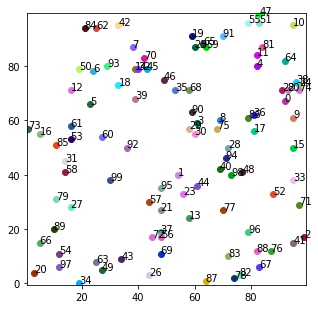

In [2]:
# Generate and plot instance
nodes = vrpSolver.rndPlainNodes(N = 100)
fig, ax = vrpSolver.plotNodes(
    nodes = nodes)
fig

### 1. Simulated Annealing

In [3]:
metaTSP = vrpSolver.metaTSP(
    nodes = nodes,
    metaAlgo = 'SimulatedAnnealing',
    metaAlgoArgs = {
        'initAlgo': 'NearestNeighbor',
        'initTemp': 100,
        'iterTemp': 200,
        'coolRate': 0.9995,
        'stopCriteria': [('Final_Temperature', 0.001)]
    })

D:\Zoo\Hummingbird\vrpSolver\vrpSolver\metaTSP.py:91: UserWarning: WARNING: Missing 'optRatio' in `metaAlgoArgs`. 'optRatio' is the percentage of taking (swap, exchange, 2Opt) operators
  warnings.warn("WARNING: Missing 'optRatio' in `metaAlgoArgs`. 'optRatio' is the percentage of taking (swap, exchange, 2Opt) operators")
D:\Zoo\Hummingbird\vrpSolver\vrpSolver\metaTSP.py:104: UserWarning: WARNING: Missing `metaAlgoArgs`. Using default settings, results may not be satisfactory.
  warnings.warn("WARNING: Missing `metaAlgoArgs`. Using default settings, results may not be satisfactory.")


NameError: name 'neighborSwap' is not defined

In [ ]:
fig, ax = vrpSolver.plotNodes(nodes = nodes)
fig, ax = vrpSolver.plotSeq(
    fig = fig,
    ax = ax,
    nodes = nodes, 
    seq = metaTSP['seq'])
fig

In [ ]:
metaTSP['ofv']

In [ ]:
metaTSP['metaStat']

Next, we compare the result with simple heuristic solution

In [ ]:
heuTSP = vrpSolver.heuTSP(
    nodes = nodes,
    consAlgo = 'Sweep',
    impAlgo = '2Opt')

In [ ]:
fig, ax = vrpSolver.plotNodes(nodes = nodes)
fig, ax = vrpSolver.plotSeq(
    fig = fig,
    ax = ax,
    nodes = nodes, 
    seq = heuTSP['seq'])
fig

In [ ]:
heuTSP['ofv']

Finally, we compare the result with optimal solution

In [ ]:
ipTSP = vrpSolver.ipTSP(
    nodes = nodes)

In [ ]:
fig, ax = vrpSolver.plotNodes(nodes = nodes)
fig, ax = vrpSolver.plotSeq(
    fig = fig,
    ax = ax,
    nodes = nodes, 
    seq = ipTSP['seq'])
fig

In [ ]:
ipTSP['ofv']

In summary:

In [ ]:
print("Optimal sol.: %s, runtime: %s[s]" % (
    round(ipTSP['ofv'], 2), 
    round(ipTSP['runtime'], 2)))
print("Heuristic sol.: %s, gap: %s%%" % (
    round(heuTSP['ofv'], 2),
    round((heuTSP['ofv'] - ipTSP['ofv']) / ipTSP['ofv'] * 100, 2)))
print("Metaheuristic sol.: %s, gap: %s%%" % (
    round(metaTSP['ofv'], 2),
    round((metaTSP['ofv'] - ipTSP['ofv']) / ipTSP['ofv'] * 100, 2)))